In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
plt.style.use('bmh')


In [3]:
from google.colab import files
uploaded = files.upload()

Saving VZ.csv to VZ.csv


In [0]:
df=pd.read_csv('VZ.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-28,49.470001,49.650002,49.380001,49.540001,39.556190,8432800
1,2015-05-29,49.500000,49.639999,49.369999,49.439999,39.476341,14778400
2,2015-06-01,49.439999,49.540001,49.139999,49.220001,39.300667,11968000
3,2015-06-02,49.220001,49.310001,48.980000,49.139999,39.236790,11094100
4,2015-06-03,49.150002,49.439999,48.869999,49.080002,39.188885,17697800


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-05-20,54.540001,54.900002,54.049999,54.259998,54.259998,21405400
1255,2020-05-21,54.430000,54.639999,53.860001,53.970001,53.970001,18201000
1256,2020-05-22,53.959999,54.290001,53.669998,54.099998,54.099998,19960000
1257,2020-05-26,54.900002,55.250000,54.180000,54.299999,54.299999,20830500
1258,2020-05-27,54.610001,55.220001,54.430000,55.139999,55.139999,17062400


In [8]:
print("Checking if any null values are present\n", df.isna().sum())

Checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


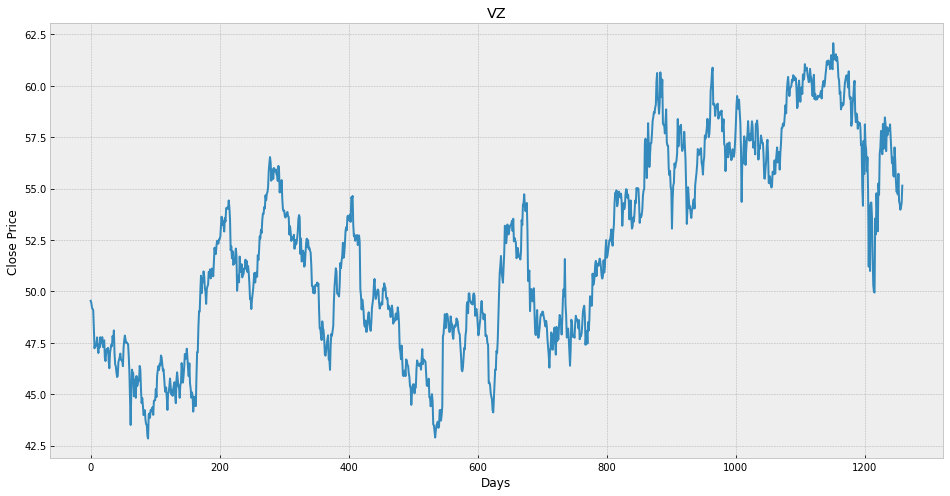

In [9]:
plt.figure(figsize=(16,8))
plt.title('VZ')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [0]:
df=df[['Close']]
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
X=np.array(df.drop(['Prediction'],1))[:-future_days]
y=np.array(df['Prediction'])[:-future_days]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size =0.25)

In [0]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)
svm=SVR(kernel='rbf',C=1e3,gamma=0.1).fit(x_train,y_train)

In [16]:
svm_confidence=svm.score(x_test,y_test)
tree_confidence=tree.score(x_test,y_test)
lr_confidence=lr.score(x_test,y_test)
print("The accuracy of all the models:")
print("SVM Model \t\t\t",svm_confidence)
print("Decision Model \t\t\t",tree_confidence)
print("Linear Regression Model \t",lr_confidence)

The accuracy of all the models:
SVM Model 			 0.7190042681736971
Decision Model 			 0.4944016787635245
Linear Regression Model 	 0.6962501415431855


In [17]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[54.310001],
       [54.32    ],
       [53.619999],
       [51.799999],
       [50.310001],
       [49.990002],
       [49.939999],
       [53.540001],
       [52.77    ],
       [54.77    ],
       [53.73    ],
       [52.919998],
       [55.25    ],
       [54.700001],
       [56.700001],
       [56.98    ],
       [57.799999],
       [57.439999],
       [56.669998],
       [58.139999],
       [56.93    ],
       [57.66    ],
       [58.459999],
       [58.130001],
       [56.82    ]])

In [18]:
tree_predict=tree.predict(x_future)
lr_predict=lr.predict(x_future)
svm_predict=svm.predict(x_future)
print(svm_predict)
print(lr_predict)
print(svm_predict)

[54.42495959 54.4507184  52.44220748 51.71651204 51.01049254 50.10563882
 49.96761245 52.21499866 50.80824259 55.45160075 52.76425808 50.93055549
 56.20538596 55.31650851 57.2365526  57.15998084 56.65398145 56.87198811
 57.23854689 56.61503943 57.18091219 56.72581427 56.82674549 56.61266305
 57.21621773]
[54.07505371 54.08339863 53.49919514 51.98026824 50.73675283 50.46968959
 50.42795833 53.43243079 52.78980704 54.45895748 53.59099925 52.91499165
 54.85955359 54.40053805 56.06968849 56.30336872 56.98771956 56.68727248
 56.04464873 57.27147514 56.26163996 56.87087987 57.53853921 57.26313106
 56.16983668]
[54.42495959 54.4507184  52.44220748 51.71651204 51.01049254 50.10563882
 49.96761245 52.21499866 50.80824259 55.45160075 52.76425808 50.93055549
 56.20538596 55.31650851 57.2365526  57.15998084 56.65398145 56.87198811
 57.23854689 56.61503943 57.18091219 56.72581427 56.82674549 56.61266305
 57.21621773]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


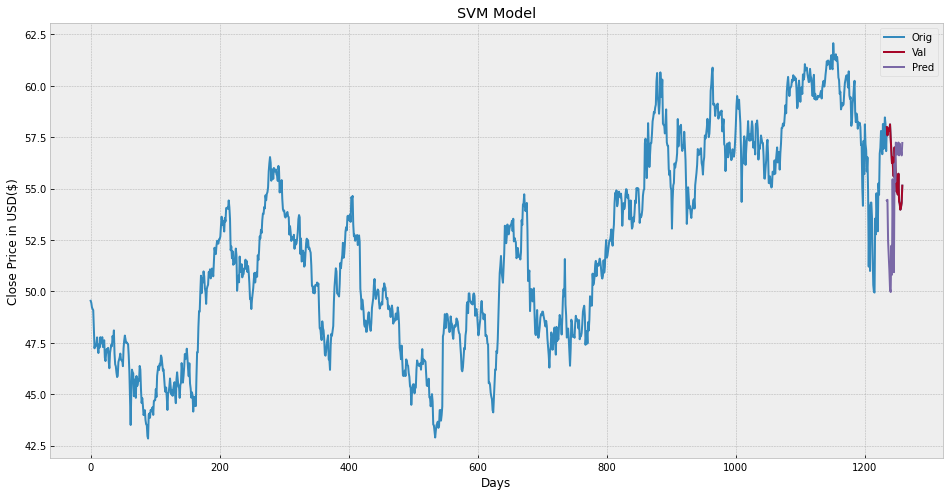

In [22]:
predictions=svm_predict
valid=df[X.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(16,8))
plt.title('SVM Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


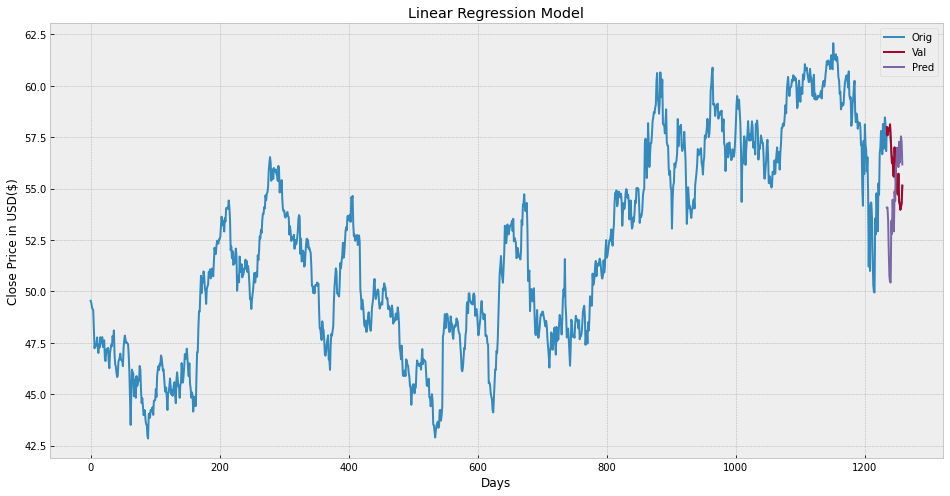

In [23]:
predictions=lr_predict
valid=df[X.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


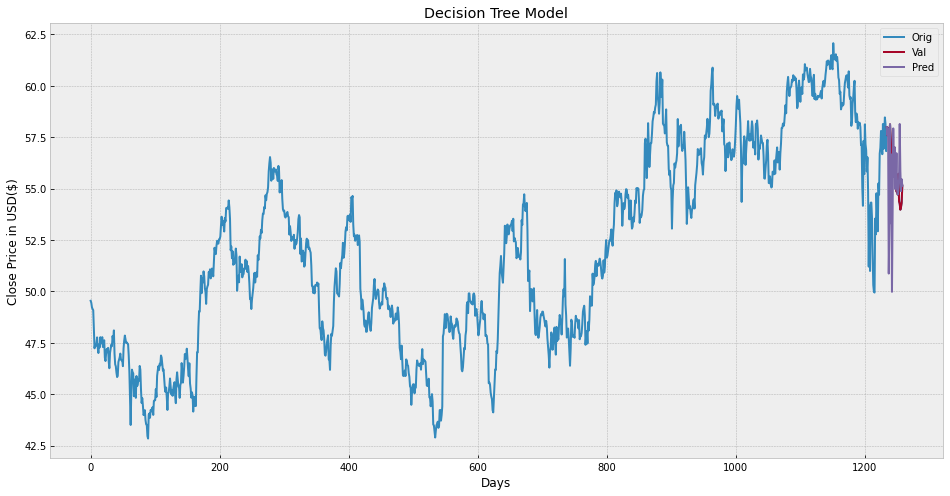

In [24]:
predictions=tree_predict
valid=df[X.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()